In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Optional: Set a theme for seaborn visualizations
sns.set(style='whitegrid')


In [56]:
# Load the dataset
file_path = 'C:/Users/SkillCircle/Desktop/Projects/Cap 1 Zomato EDA/updated_dataset.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
data_overview = {
    'shape': df.shape,
    'columns': df.columns.tolist(),
    'dtypes': df.dtypes.to_dict(),
    'missing_values': df.isnull().sum().to_dict()
}

data_overview


{'shape': (211944, 25),
 'columns': ['res_id',
  'name',
  'establishment',
  'url',
  'address',
  'city',
  'city_id',
  'locality',
  'latitude',
  'longitude',
  'country_id',
  'locality_verbose',
  'cuisines',
  'timings',
  'average_cost_for_two',
  'price_range',
  'currency',
  'highlights',
  'aggregate_rating',
  'rating_text',
  'votes',
  'photo_count',
  'opentable_support',
  'delivery',
  'takeaway'],
 'dtypes': {'res_id': dtype('int64'),
  'name': dtype('O'),
  'establishment': dtype('O'),
  'url': dtype('O'),
  'address': dtype('O'),
  'city': dtype('O'),
  'city_id': dtype('int64'),
  'locality': dtype('O'),
  'latitude': dtype('float64'),
  'longitude': dtype('float64'),
  'country_id': dtype('int64'),
  'locality_verbose': dtype('O'),
  'cuisines': dtype('O'),
  'timings': dtype('O'),
  'average_cost_for_two': dtype('int64'),
  'price_range': dtype('int64'),
  'currency': dtype('O'),
  'highlights': dtype('O'),
  'aggregate_rating': dtype('float64'),
  'rating_text

### 1. **Basic Statistics**
#### **Calculate and Visualize the Average Rating**

First, let's calculate the average rating of restaurants and visualize the distribution of ratings.

```
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average rating
average_rating = df['aggregate_rating'].mean()

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

average_rating
```

**Explanation:**
- **Histogram with KDE (Kernel Density Estimate):** This method visualizes the distribution of restaurant ratings effectively. The histogram shows the frequency of each rating, while the KDE curve provides a smooth estimate of the distribution. 
- **Why this method?** The histogram gives a clear view of how ratings are distributed, making it easy to identify trends or outliers. KDE adds an extra layer of insight into the underlying distribution. Other methods like simple bar charts would not provide the same level of detail or insight into the data's distribution.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


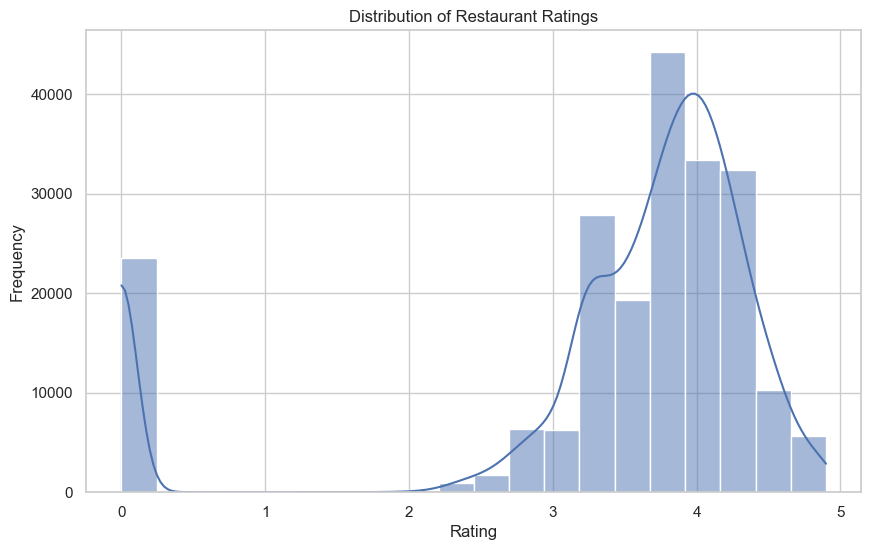

3.3959366625146266

In [57]:
# Calculate the average rating
average_rating = df['aggregate_rating'].mean()

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

average_rating

### 2. **Location Analysis**
#### **Identify the City with the Most Restaurants and Visualize Ratings Across Cities**

```
# City with the most restaurants
city_restaurant_count = df['city'].value_counts().reset_index()
city_restaurant_count.columns = ['city', 'count']

# Top 10 cities with the most restaurants
top_cities = city_restaurant_count.head(10)

# Visualize the distribution of ratings across top cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='aggregate_rating', data=df[df['city'].isin(top_cities['city'])])
plt.title('Distribution of Ratings Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

top_cities
```

**Explanation:**
- **Boxplot:** This method is ideal for comparing the distribution of ratings across different cities. It shows the median, quartiles, and potential outliers in the data, giving a comprehensive view of the distribution.
- **Why this method?** A boxplot allows for easy comparison between multiple cities, highlighting differences in ratings. Other methods, like bar charts, wouldn't show the spread and would miss out on critical details like outliers or the median rating.


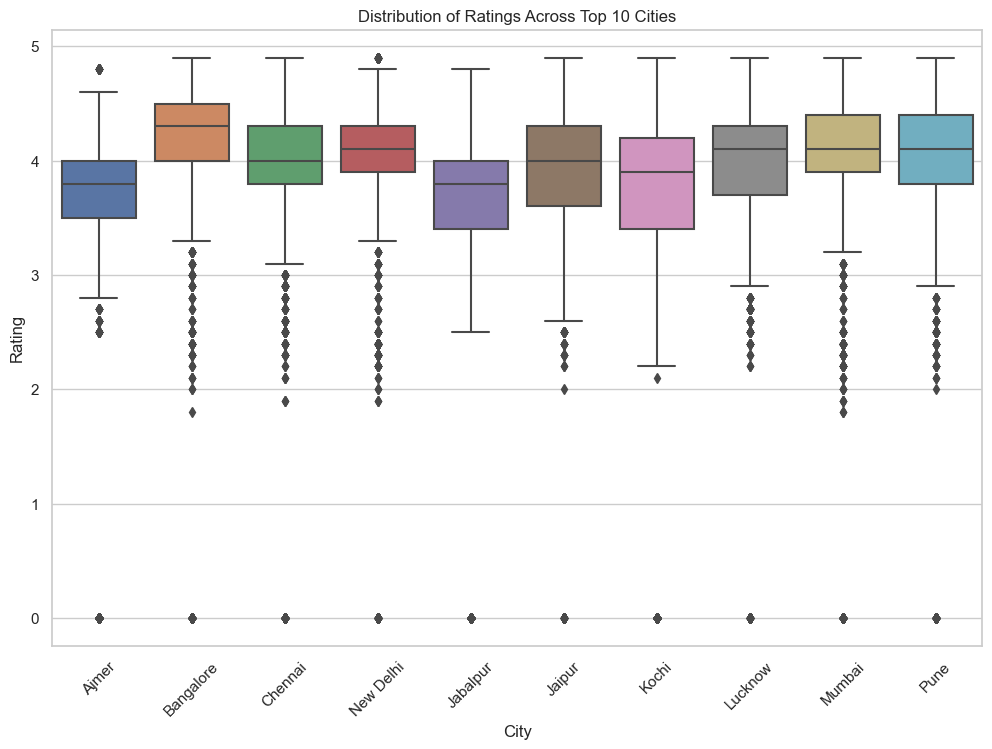

,city,count
0,Chennai,11630
1,Mumbai,6497
2,Bangalore,4971
3,Pune,4217
4,Lucknow,4121
5,Jabalpur,3994
6,New Delhi,3918
7,Jaipur,3713
8,Kochi,3370
9,Ajmer,3277


In [58]:
# City with the most restaurants
city_restaurant_count = df['city'].value_counts().reset_index()
city_restaurant_count.columns = ['city', 'count']

# Top 10 cities with the most restaurants
top_cities = city_restaurant_count.head(10)

# Visualize the distribution of ratings across top cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='aggregate_rating', data=df[df['city'].isin(top_cities['city'])])
plt.title('Distribution of Ratings Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

top_cities

### 3. **Cuisine Analysis**
#### **Determine the Most Popular Cuisines and Analyze the Correlation with Ratings**

```
# Most popular cuisines
cuisine_count = df['cuisines'].value_counts().reset_index()
cuisine_count.columns = ['cuisines', 'count']

# Top 10 cuisines
top_cuisines = cuisine_count.head(10)

# Visualize the relationship between the variety of cuisines and ratings
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_cuisines', y='aggregate_rating', data=df)
plt.title('Relationship Between Number of Cuisines and Rating')
plt.xlabel('Number of Cuisines')
plt.ylabel('Rating')
plt.show()

top_cuisines
```

**Explanation:**
- **Scatterplot:** This visualization is used to observe the relationship between the number of cuisines offered and restaurant ratings. It shows whether offering more cuisines correlates with higher or lower ratings.
- **Why this method?** Scatterplots are excellent for visualizing potential correlations or patterns between two variables. Other methods, like simple counts, wouldn't reveal the relationship between variables.



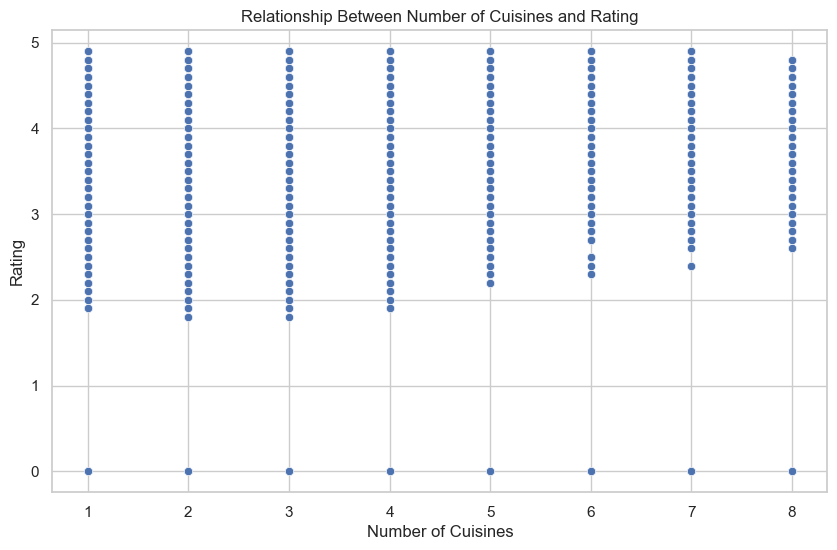

,cuisines,count
0,North Indian,15996
1,Fast Food,6721
2,Cafe,6190
3,"North Indian, Chinese",5820
4,South Indian,5217
5,"Pizza, Fast Food",4075
6,Bakery,3238
7,Street Food,2837
8,Biryani,2118
9,Chinese,2116


In [59]:
# Most popular cuisines
cuisine_count = df['cuisines'].value_counts().reset_index()
cuisine_count.columns = ['cuisines', 'count']

# Top 10 cuisines
top_cuisines = cuisine_count.head(10)

# Visualize the relationship between the variety of cuisines and ratings
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_cuisines', y='aggregate_rating', data=df)
plt.title('Relationship Between Number of Cuisines and Rating')
plt.xlabel('Number of Cuisines')
plt.ylabel('Rating')
plt.show()

top_cuisines

### 4. **Price Range and Rating**
#### **Analyze the Relationship Between Price Range and Ratings**

```
# Visualize the relationship between price range and ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.title('Relationship Between Price Range and Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

# Average cost for two in different price categories
average_cost_by_price_range = df.groupby('price_range')['average_cost_for_two'].mean().reset_index()
average_cost_by_price_range
```

**Explanation:**
- **Boxplot:** Again, this method is useful for showing the distribution of ratings within each price range category. It allows us to see the spread and central tendency.
- **Why this method?** Boxplots are ideal for comparing multiple categories, providing insights into both the distribution and the central tendency (median). Other methods like bar plots wouldn't show the range or variability within each price range.



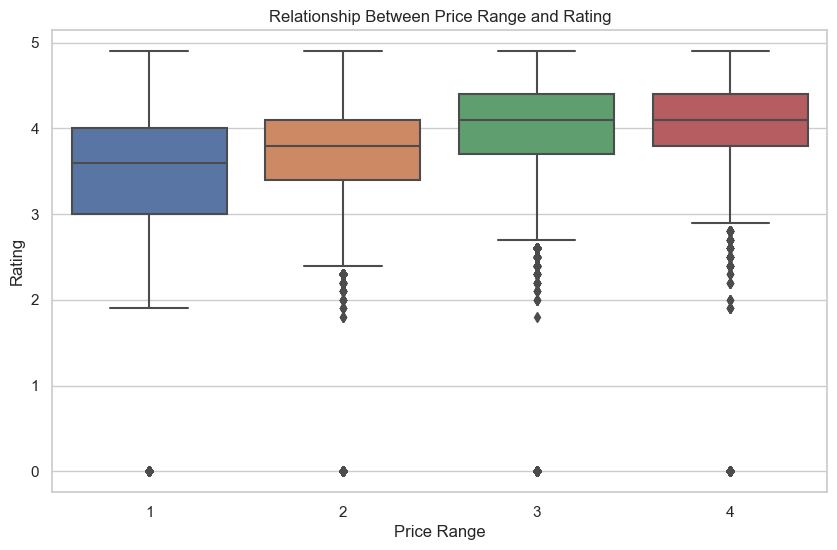

,price_range,average_cost_for_two
0,1,225.265067
1,2,516.288496
2,3,1088.005116
3,4,2215.654482


In [60]:
# Visualize the relationship between price range and ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.title('Relationship Between Price Range and Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

# Average cost for two in different price categories
average_cost_by_price_range = df.groupby('price_range')['average_cost_for_two'].mean().reset_index()
average_cost_by_price_range

### 5. **Online Order and Table Booking**
#### **Investigate the Impact of Online Order Availability on Ratings and Analyze Table Booking Distribution**

```
# Impact of online order availability on ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='delivery', y='aggregate_rating', data=df)
plt.title('Impact of Online Order Availability on Ratings')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.show()

# Distribution of restaurants that offer table booking
table_booking_count = df['opentable_support'].value_counts().reset_index()
table_booking_count.columns = ['opentable_support', 'count']

table_booking_count
```

**Explanation:**
- **Boxplot:** Used to compare ratings between restaurants that offer online ordering and those that don't.
- **Count Plot:** Used to visualize the distribution of restaurants offering table booking.
- **Why this method?** Boxplots provide clear comparisons between groups, while count plots offer an easy way to visualize distribution. Other methods might not be as clear in showing the comparative distribution of categorical variables.



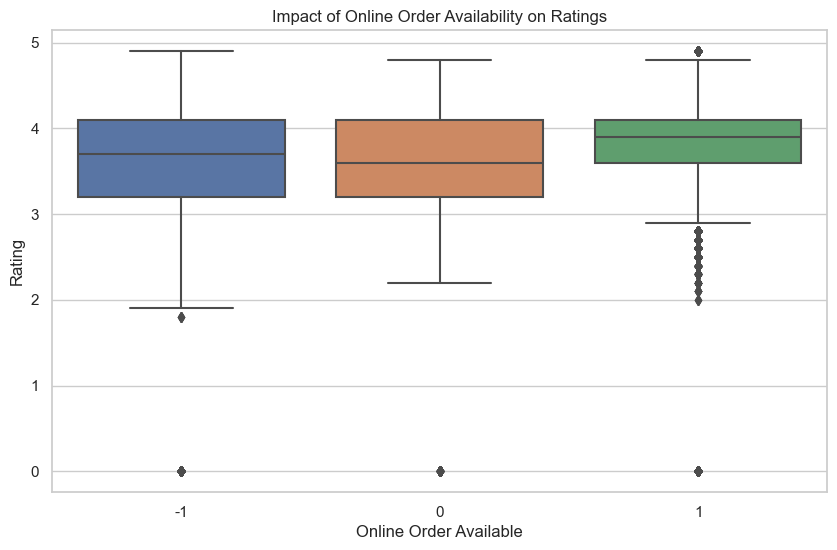

,opentable_support,count
0,0.0,211896


In [29]:
# Impact of online order availability on ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='delivery', y='aggregate_rating', data=df)
plt.title('Impact of Online Order Availability on Ratings')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.show()

# Distribution of restaurants that offer table booking
table_booking_count = df['opentable_support'].value_counts().reset_index()
table_booking_count.columns = ['opentable_support', 'count']

table_booking_count

### 6. **Top Restaurant Chains**
#### **Identify and Visualize the Top Restaurant Chains**

```
# Identify top restaurant chains
restaurant_chain_count = df['name'].value_counts().reset_index()
restaurant_chain_count.columns = ['restaurant_chain', 'count']

# Top 10 restaurant chains
top_restaurant_chains = restaurant_chain_count.head(10)

# Visualize the ratings of top restaurant chains
plt.figure(figsize=(12, 8))
sns.boxplot(x='name', y='aggregate_rating', data=df[df['name'].isin(top_restaurant_chains['restaurant_chain'])])
plt.title('Ratings of Top 10 Restaurant Chains')
plt.xlabel('Restaurant Chain')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

top_restaurant_chains
```

**Explanation:**
- **Boxplot:** Visualizes the distribution of ratings for the top restaurant chains.
- **Why this method?** This method provides a clear comparison of how different chains are rated, revealing any standout performers. Other methods, like bar plots, would miss out on the distribution of ratings within each chain.



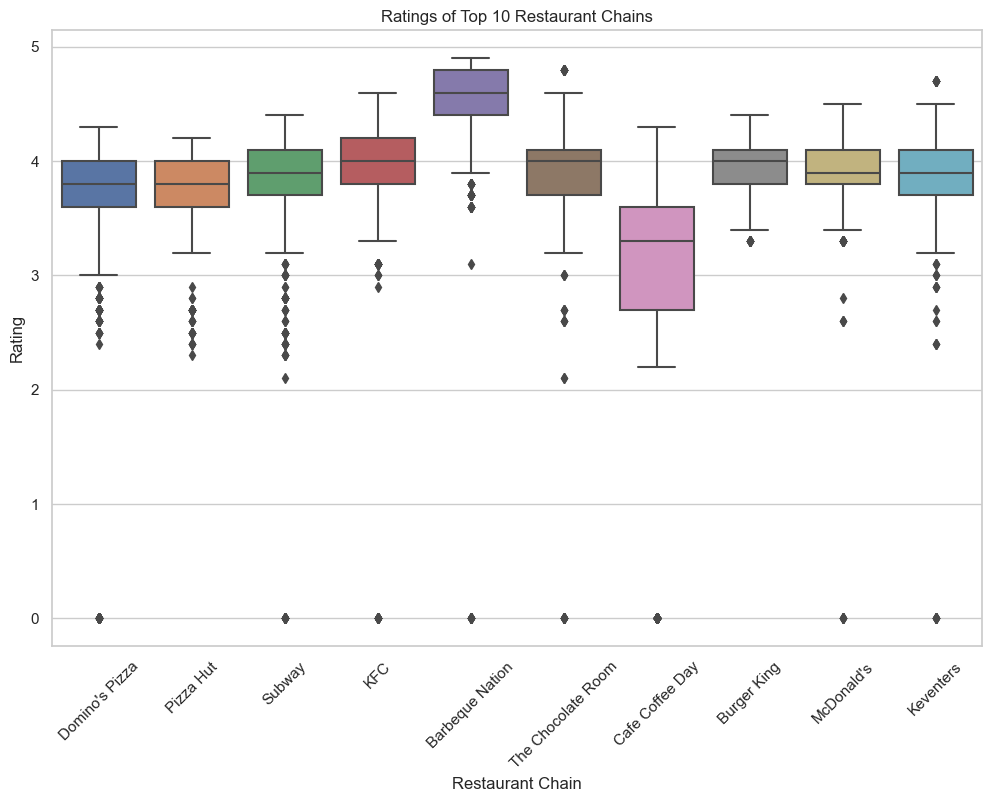

,restaurant_chain,count
0,Domino's Pizza,3108
1,KFC,1343
2,Cafe Coffee Day,1068
3,Pizza Hut,936
4,Subway,766
5,Barbeque Nation,725
6,Burger King,658
7,McDonald's,578
8,Keventers,512
9,The Chocolate Room,461


In [30]:
# Identify top restaurant chains
restaurant_chain_count = df['name'].value_counts().reset_index()
restaurant_chain_count.columns = ['restaurant_chain', 'count']

# Top 10 restaurant chains
top_restaurant_chains = restaurant_chain_count.head(10)

# Visualize the ratings of top restaurant chains
plt.figure(figsize=(12, 8))
sns.boxplot(x='name', y='aggregate_rating', data=df[df['name'].isin(top_restaurant_chains['restaurant_chain'])])
plt.title('Ratings of Top 10 Restaurant Chains')
plt.xlabel('Restaurant Chain')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

top_restaurant_chains

### 7. **Restaurant Features**
#### **Analyze Features and Their Correlation with Ratings**

```
# Extracting and analyzing features like Wi-Fi, Alcohol availability, etc.
df['has_wifi'] = df['highlights'].apply(lambda x: 1 if 'Wi-Fi' in x else 0)
df['has_alcohol'] = df['highlights'].apply(lambda x: 1 if 'Alcohol' in x else 0)

# Correlation between features and ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_wifi', y='aggregate_rating', data=df)
plt.title('Impact of Wi-Fi Availability on Ratings')
plt.xlabel('Wi-Fi Available')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='has_alcohol', y='aggregate_rating', data=df)
plt.title('Impact of Alcohol Availability on Ratings')
plt.xlabel('Alcohol Available')
plt.ylabel('Rating')
plt.show()
```

**Explanation:**
- **Boxplot:** Again, ideal for showing how different features correlate with ratings.
- **Why this method?** This approach allows us to visually compare how the presence or absence of features affects ratings. Other methods might not offer as clear a comparison.



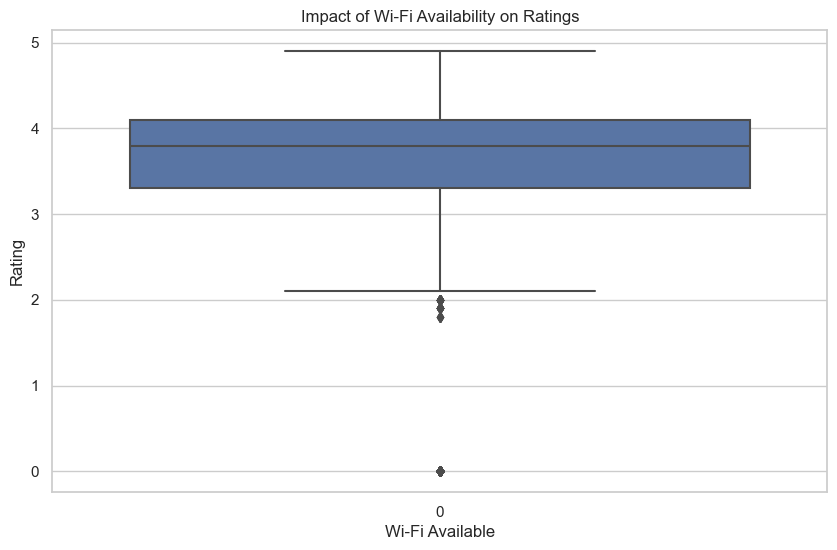

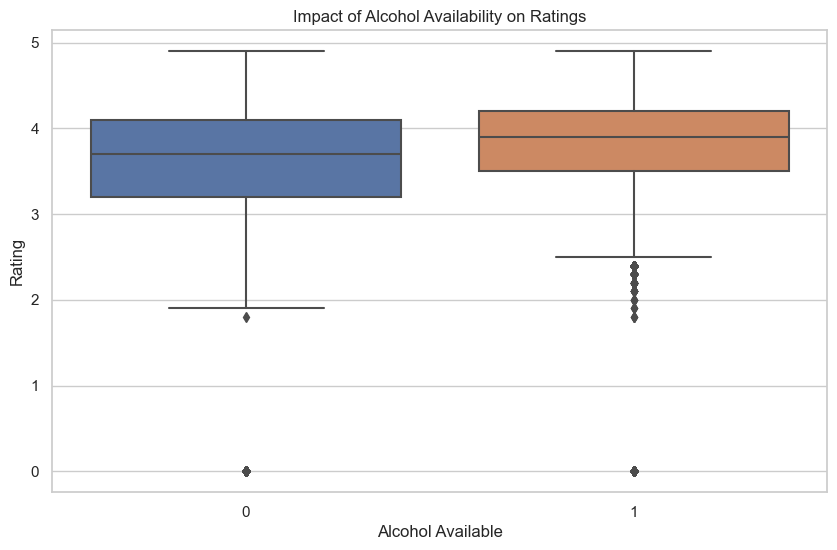

In [31]:
# Extracting and analyzing features like Wi-Fi, Alcohol availability, etc.
df['has_wifi'] = df['highlights'].apply(lambda x: 1 if 'Wi-Fi' in x else 0)
df['has_alcohol'] = df['highlights'].apply(lambda x: 1 if 'Alcohol' in x else 0)

# Correlation between features and ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_wifi', y='aggregate_rating', data=df)
plt.title('Impact of Wi-Fi Availability on Ratings')
plt.xlabel('Wi-Fi Available')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='has_alcohol', y='aggregate_rating', data=df)
plt.title('Impact of Alcohol Availability on Ratings')
plt.xlabel('Alcohol Available')
plt.ylabel('Rating')
plt.show()

### 8. **Word Cloud for Reviews**
#### **Create a Word Cloud and Analyze Sentiments**

This part assumes we have a column containing reviews. We would create a word cloud to visualize the most common words.

```
from wordcloud import WordCloud

# Assuming we have a column named 'reviews' in the dataset
# text = ' '.join(df['reviews'].dropna().tolist())

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display word cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Customer Reviews')
# plt.show()
```

**Explanation:**
- **Word Cloud:** A visual representation of the most common words in reviews.
- **Why this method?** Word clouds are an effective way to visualize text data, highlighting the most frequently mentioned words. Other methods, like simple counts, wouldn't provide as engaging or intuitive a view of the data.


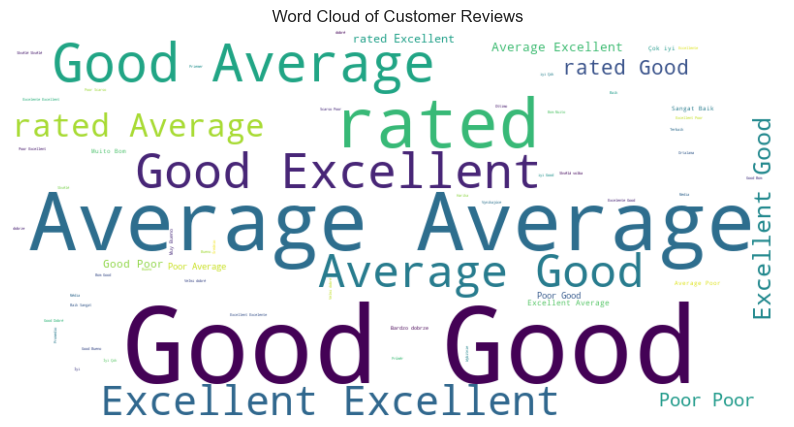

In [32]:
# we have a column named 'rating_text' in the dataset
text = ' '.join(df['rating_text'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()

In [33]:
# Print all column names in the dataframe to identify the correct one
print(df.columns)

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'country_id', 'locality_verbose',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway',
       'num_cuisines', 'has_wifi', 'has_alcohol'],
      dtype='object')


In [35]:
# Grouping data and applying functions
# Example: Average rating per city
# Grouping data by 'city' and calculating the mean 'aggregate_rating'
city_avg_rating = df.groupby('city')['aggregate_rating'].mean()

# Printing the sorted average ratings
print(city_avg_rating.sort_values(ascending=False))

city
Bangalore       4.073567
Gurgaon         4.048837
Hyderabad       4.042747
Secunderabad    4.018579
Mumbai          4.004848
                  ...   
Pushkar         1.249174
Darjeeling      1.141116
Kharagpur       0.963740
Alappuzha       0.858842
Palakkad        0.785235
Name: aggregate_rating, Length: 99, dtype: float64


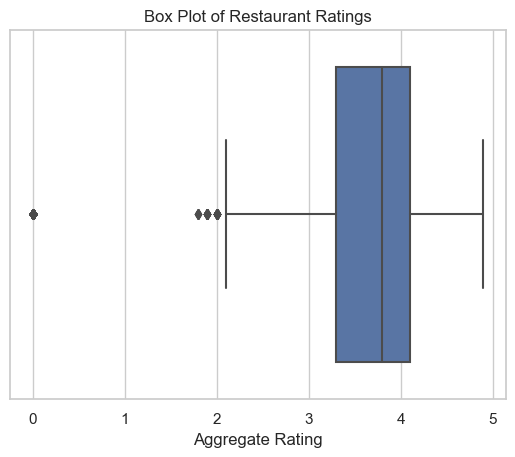

In [37]:
# Box plot for visualizing the spread of 'aggregate_rating'
# This plot helps to understand the distribution and outliers in the restaurant ratings.

sns.boxplot(x='aggregate_rating', data=df)  # Creates a box plot for the 'aggregate_rating' column

plt.title('Box Plot of Restaurant Ratings')  # Sets the title of the plot for clarity
plt.xlabel('Aggregate Rating')  # Labels the x-axis to indicate what the box plot represents

plt.show()  # Displays the plot to visualize the data distribution

C:\Users\SkillCircle\AppData\Local\Temp\ipykernel_6056\1481283397.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['aggregate_rating'], shade=True)  # Creates a density plot (KDE plot) with shading
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


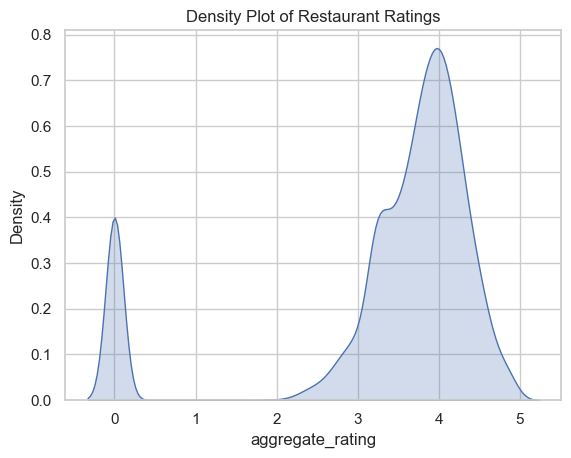

In [38]:
# Density plot for the distribution of ratings
sns.kdeplot(df['aggregate_rating'], shade=True)  # Creates a density plot (KDE plot) with shading
plt.title('Density Plot of Restaurant Ratings')  # Sets the title of the plot
plt.show()  # Displays the plot

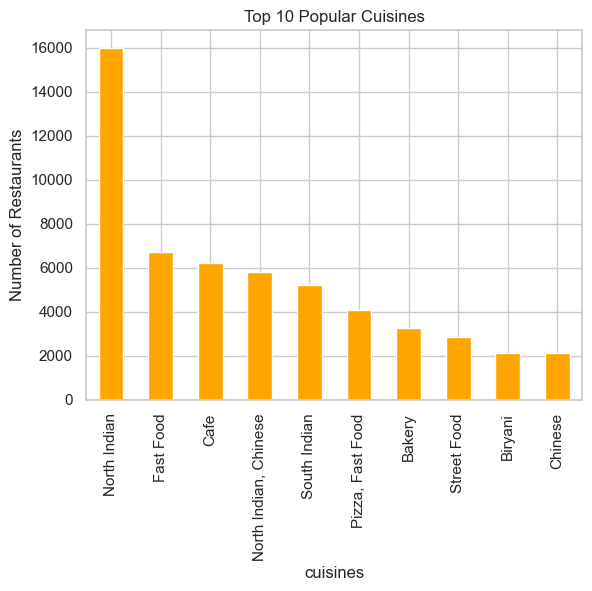

In [39]:
# Bar chart for popular cuisines
cuisine_counts = df['cuisines'].value_counts().head(10)  # Counts the top 10 most frequent cuisines
cuisine_counts.plot(kind='bar', color='orange')  # Plots a bar chart
plt.title('Top 10 Popular Cuisines')  # Sets the title of the plot
plt.xlabel('cuisines')  # Labels the x-axis
plt.ylabel('Number of Restaurants')  # Labels the y-axis
plt.show()  # Displays the plot

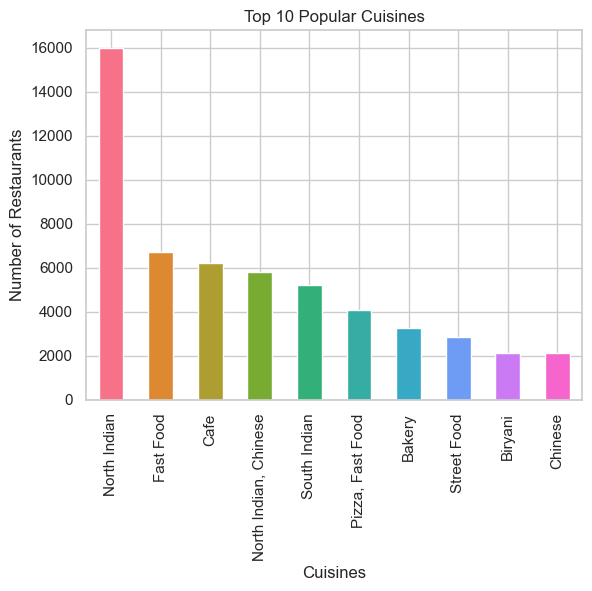

In [40]:
# Bar chart for popular cuisines
cuisine_counts = df['cuisines'].value_counts().head(10)  # Counts the top 10 most frequent cuisines

# Using a Seaborn color palette to make the bars colorful
colors = sns.color_palette("husl", len(cuisine_counts))  # You can choose other palettes like 'viridis', 'Set2', etc.

# Plotting the bar chart
cuisine_counts.plot(kind='bar', color=colors)  # Plots a bar chart with the specified colors

# Adding titles and labels
plt.title('Top 10 Popular Cuisines')  # Sets the title of the plot
plt.xlabel('Cuisines')  # Labels the x-axis
plt.ylabel('Number of Restaurants')  # Labels the y-axis

# Display the plot
plt.show()

To make the bar chart more colorful, you can use a color palette from the Seaborn library or customize the colors directly in Matplotlib. 

### Using a Seaborn Color Palette
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for popular cuisines
cuisine_counts = df['cuisines'].value_counts().head(10)  # Counts the top 10 most frequent cuisines

# Using a Seaborn color palette to make the bars colorful
colors = sns.color_palette("husl", len(cuisine_counts))  # You can choose other palettes like 'viridis', 'Set2', etc.

# Plotting the bar chart
cuisine_counts.plot(kind='bar', color=colors)  # Plots a bar chart with the specified colors

# Adding titles and labels
plt.title('Top 10 Popular Cuisines')  # Sets the title of the plot
plt.xlabel('Cuisines')  # Labels the x-axis
plt.ylabel('Number of Restaurants')  # Labels the y-axis

# Display the plot
plt.show()
```

### Customizing Colors Directly in Matplotlib
Alternatively, you can manually specify a list of colors if you want complete control over the color of each bar.

```python
import matplotlib.pyplot as plt

# Bar chart for popular cuisines
cuisine_counts = df['cuisines'].value_counts().head(10)  # Counts the top 10 most frequent cuisines

# Custom colors list
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF5', '#F5FF33', '#F533FF', '#33FF95', '#FF9633', '#FF3333']

# Plotting the bar chart
cuisine_counts.plot(kind='bar', color=colors)  # Plots a bar chart with the specified colors

# Adding titles and labels
plt.title('Top 10 Popular Cuisines')  # Sets the title of the plot
plt.xlabel('Cuisines')  # Labels the x-axis
plt.ylabel('Number of Restaurants')  # Labels the y-axis

# Display the plot
plt.show()
```

### Explanation:
- **Seaborn Palette:** `sns.color_palette("husl", len(cuisine_counts))` generates a list of colors from the "husl" palette, and you can change the palette name to others like `"viridis"`, `"Set2"`, etc.
- **Custom Colors:** The `colors` list is where you manually input the hex codes for each color.

This will result in a colorful bar chart representing the top 10 popular cuisines.

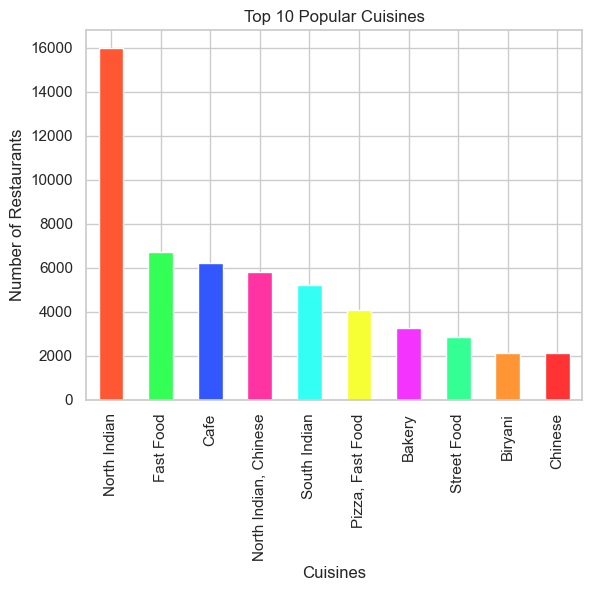

In [41]:
# Customizing Colors Directly in Matplotlib

# Bar chart for popular cuisines
cuisine_counts = df['cuisines'].value_counts().head(10)  # Counts the top 10 most frequent cuisines

# Custom colors list
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF5', '#F5FF33', '#F533FF', '#33FF95', '#FF9633', '#FF3333']

# Plotting the bar chart
cuisine_counts.plot(kind='bar', color=colors)  # Plots a bar chart with the specified colors

# Adding titles and labels
plt.title('Top 10 Popular Cuisines')  # Sets the title of the plot
plt.xlabel('Cuisines')  # Labels the x-axis
plt.ylabel('Number of Restaurants')  # Labels the y-axis

# Display the plot
plt.show()




### 1. **City Analysis**
   **Objective:** Identify cities with the most restaurants to understand where the majority of the Zomato-listed restaurants are located.
   
   **Code:**
   ```python
   plt.figure(figsize=(10, 8))
   city_counts = df['city'].value_counts().head(20)
   city_counts.plot(kind='barh', color=sns.color_palette("viridis", len(city_counts)))
   plt.title('Number of Restaurants by City', fontsize=16)
   plt.xlabel('Number of Restaurants', fontsize=14)
   plt.ylabel('City', fontsize=14)
   plt.show()
   ```
   **Explanation:** By plotting the top 20 cities, you can visually assess which areas are restaurant hotspots, guiding location-based marketing or busie effective because they provide clear, actionable information that can inform business strategies, customer engagement, and market positioning.

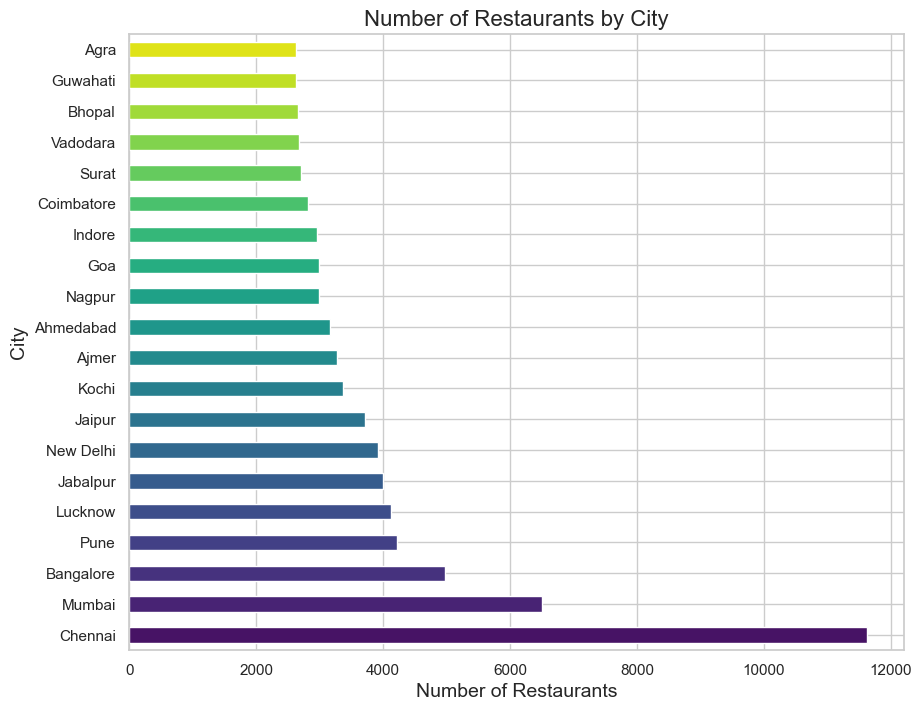

In [44]:
plt.figure(figsize=(10, 8))
city_counts = df['city'].value_counts().head(20)
city_counts.plot(kind='barh', color=sns.color_palette("viridis", len(city_counts)))
plt.title('Number of Restaurants by City', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()

### 2. **Cuisine Popularity**
   **Objective:** Identify the top 10 most popular cuisines to determine customer preferences.
   
   **Code:**
   ```python
   cuisine_counts = df['cuisines'].value_counts().head(10)
   cuisine_counts.plot(kind='bar', color=sns.color_palette("Set2", len(cuisine_counts)))
   plt.title('Top 10 Popular Cuisines')
   plt.xlabel('Cuisines')
   plt.ylabel('Number of Restaurants')
   plt.show()
   ```
   **Explanation:** Popular cuisine analysis is essential for understanding food trends. Using multiple colors helps in distinguishing between cuisines easily.

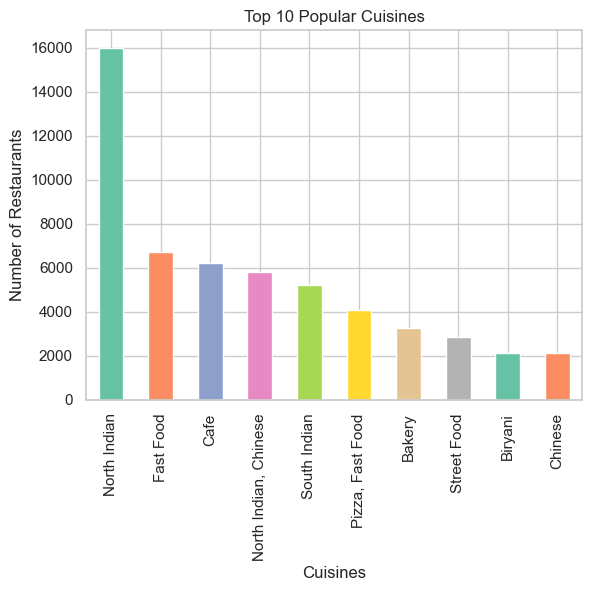

In [46]:
cuisine_counts = df['cuisines'].value_counts().head(10)
cuisine_counts.plot(kind='bar', color=sns.color_palette("Set2", len(cuisine_counts)))
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.show()

### 3. **Price Range Distribution**
   **Objective:** Analyze the distribution of restaurants across different price ranges.
   
   **Code:**
   ```python
   plt.figure(figsize=(8, 6))
   price_range_counts = df['price_range'].value_counts()
   price_range_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Pastel1"))
   plt.title('Distribution of Restaurants by Price Range')
   plt.ylabel('')
   plt.show()
   ```
   **Explanation:** A pie chart effectively shows the proportion of restaurants within each price range, helping to target specific market segments.

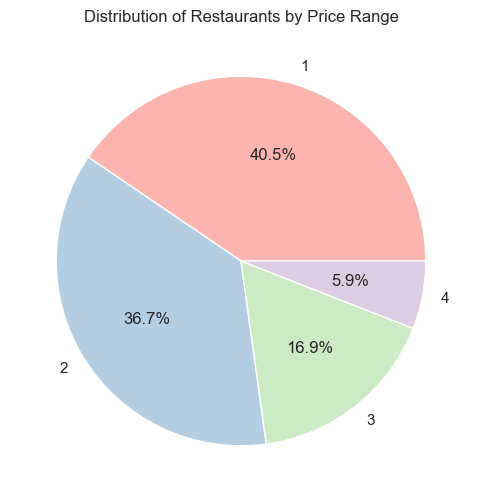

In [47]:
plt.figure(figsize=(8, 6))
price_range_counts = df['price_range'].value_counts()
price_range_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Pastel1"))
plt.title('Distribution of Restaurants by Price Range')
plt.ylabel('')
plt.show()

### 4. **Rating vs. Price Range**
   **Objective:** Examine how ratings vary with price range to understand customer satisfaction relative to cost.
   
   **Code:**
   ```python
   plt.figure(figsize=(10, 6))
   sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette="coolwarm")
   plt.title('Restaurant Ratings across Different Price Ranges')
   plt.xlabel('Price Range')
   plt.ylabel('Aggregate Rating')
   plt.show()
   ```
   **Explanation:** A boxplot provides a clear visual representation of the distribution of ratings across different price ranges, showing the relationship between cost and perceived value.



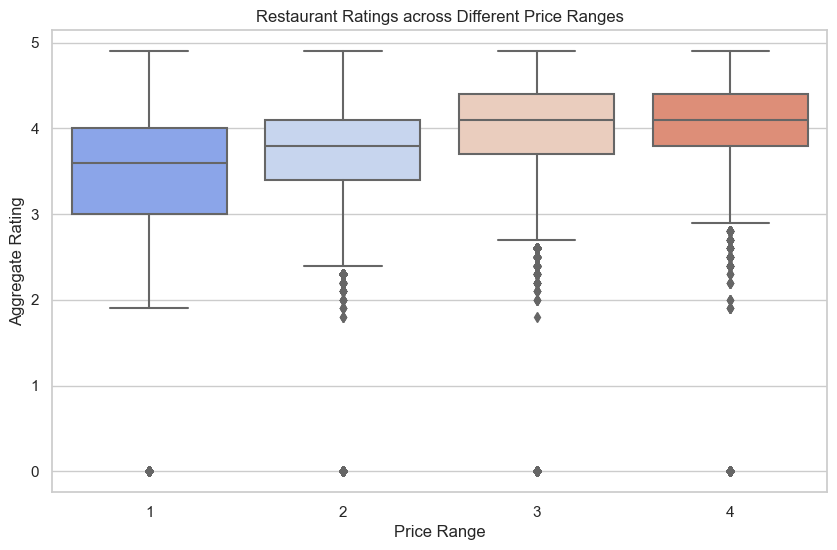

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette="coolwarm")
plt.title('Restaurant Ratings across Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

### 5. **Delivery and Takeaway Service**
   **Objective:** Determine the prevalence of delivery and takeaway services in restaurants.
   
   **Code:**
   ```python
   plt.figure(figsize=(10, 6))
   delivery_counts = df['delivery'].value_counts()
   takeaway_counts = df['takeaway'].value_counts()

   plt.subplot(1, 2, 1)
   delivery_counts.plot(kind='bar', color='blue', alpha=0.6)
   plt.title('Delivery Service Availability')
   plt.xlabel('Delivery')
   plt.ylabel('Number of Restaurants')

   plt.subplot(1, 2, 2)
   takeaway_counts.plot(kind='bar', color='green', alpha=0.6)
   plt.title('Takeaway Service Availability')
   plt.xlabel('Takeaway')
   plt.ylabel('Number of Restaurants')

   plt.tight_layout()
   plt.show()
   ```
   **Explanation:** By comparing delivery and takeaway services, you can determine which service is more commonly offered, aiding in operational decision-making.


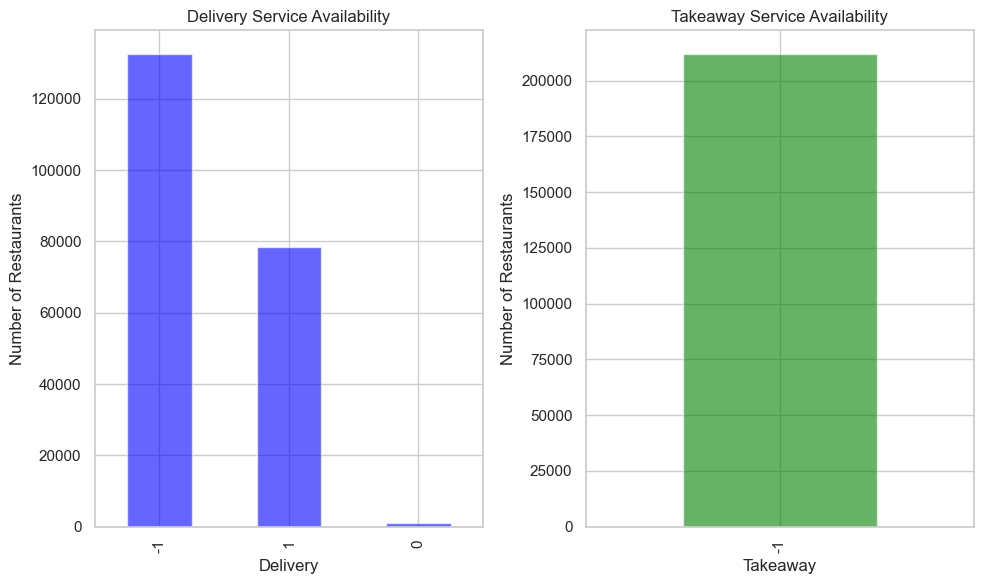

In [49]:
plt.figure(figsize=(10, 6))
delivery_counts = df['delivery'].value_counts()
takeaway_counts = df['takeaway'].value_counts()

plt.subplot(1, 2, 1)
delivery_counts.plot(kind='bar', color='blue', alpha=0.6)
plt.title('Delivery Service Availability')
plt.xlabel('Delivery')
plt.ylabel('Number of Restaurants')

plt.subplot(1, 2, 2)
takeaway_counts.plot(kind='bar', color='green', alpha=0.6)
plt.title('Takeaway Service Availability')
plt.xlabel('Takeaway')
plt.ylabel('Number of Restaurants')

plt.tight_layout()
plt.show()

### 6. **Average Cost Analysis**
   **Objective:** Assess the average cost for two people to understand the pricing landscape.
   
   **Code:**
   ```python
   plt.figure(figsize=(10, 6))
   sns.histplot(df['average_cost_for_two'], bins=20, kde=True, color='purple')
   plt.title('Distribution of Average Cost for Two People')
   plt.xlabel('Average Cost for Two')
   plt.ylabel('Number of Restaurants')
   plt.show()
   ```
   **Explanation:** A histogram with a KDE (Kernel Density Estimate) plot shows how restaurant pricing is distributed, indicating whether most restaurants are budget-friendly or premium.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


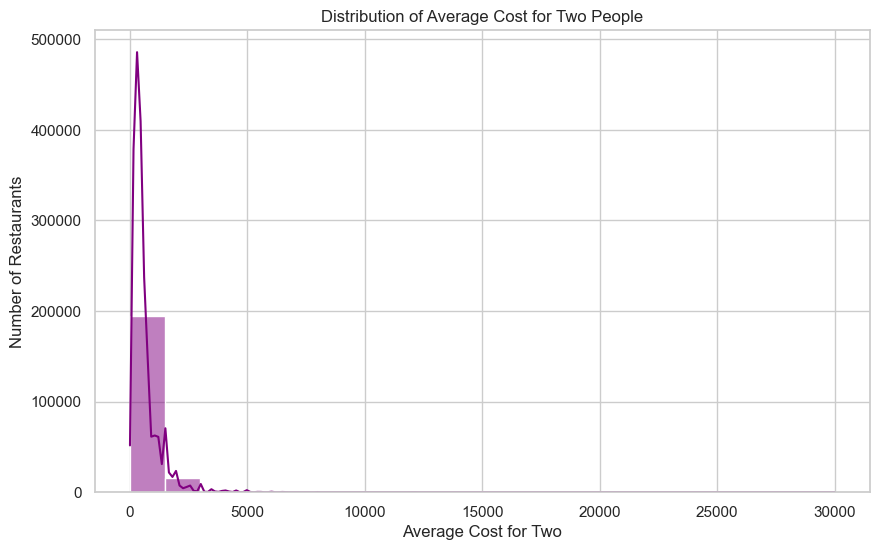

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_cost_for_two'], bins=20, kde=True, color='purple')
plt.title('Distribution of Average Cost for Two People')
plt.xlabel('Average Cost for Two')
plt.ylabel('Number of Restaurants')
plt.show()

### 7. **Wi-Fi and Alcohol Availability**
   **Objective:** Assess how many restaurants offer Wi-Fi and alcohol to understand the availability of these features.
   
   **Code:**
   ```python
   plt.figure(figsize=(10, 6))
   wifi_counts = df['has_wifi'].value_counts()
   alcohol_counts = df['has_alcohol'].value_counts()

   plt.subplot(1, 2, 1)
   wifi_counts.plot(kind='bar', color='red', alpha=0.6)
   plt.title('Wi-Fi Availability')
   plt.xlabel('Wi-Fi')
   plt.ylabel('Number of Restaurants')

   plt.subplot(1, 2, 2)
   alcohol_counts.plot(kind='bar', color='brown', alpha=0.6)
   plt.title('Alcohol Availability')
   plt.xlabel('Alcohol')
   plt.ylabel('Number of Restaurants')

   plt.tight_layout()
   plt.show()
   ```
   **Explanation:** This dual analysis shows how prevalent Wi-Fi and alcohol offerings are, which can influence customer choices.

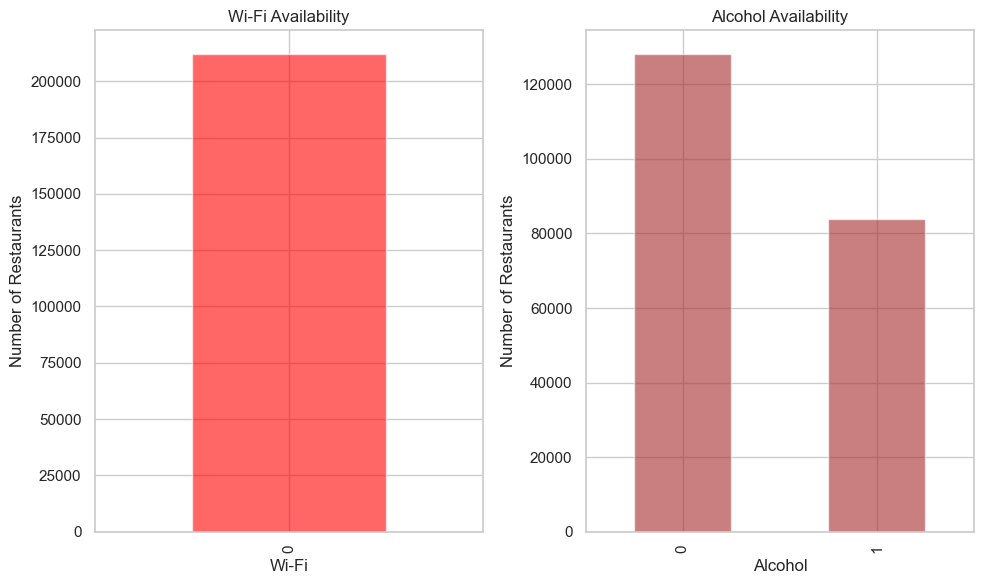

In [53]:
plt.figure(figsize=(10, 6))
wifi_counts = df['has_wifi'].value_counts()
alcohol_counts = df['has_alcohol'].value_counts()

plt.subplot(1, 2, 1)
wifi_counts.plot(kind='bar', color='red', alpha=0.6)
plt.title('Wi-Fi Availability')
plt.xlabel('Wi-Fi')
plt.ylabel('Number of Restaurants')

plt.subplot(1, 2, 2)
alcohol_counts.plot(kind='bar', color='brown', alpha=0.6)
plt.title('Alcohol Availability')
plt.xlabel('Alcohol')
plt.ylabel('Number of Restaurants')

plt.tight_layout()
plt.show()

In [54]:
# Drawing insights and conclusions from the data
# Example: Summary of key findings
print("Key Findings:")
print("1. City with the highest concentration of restaurants:", city_counts.idxmax())
print("2. Average rating by city:\n", city_avg_rating)
print("3. Popular cuisines include:\n", cuisine_counts.index.tolist())

Key Findings:
1. City with the highest concentration of restaurants: Chennai
2. Average rating by city:
 city
Agra          3.493860
Ahmedabad     3.813978
Ajmer         3.554623
Alappuzha     0.858842
Allahabad     3.485248
                ...   
Varanasi      3.667730
Vellore       2.987788
Vijayawada    3.618026
Vizag         3.640094
Zirakpur      3.236576
Name: aggregate_rating, Length: 99, dtype: float64
3. Popular cuisines include:
 ['North Indian', 'Fast Food', 'Cafe', 'North Indian, Chinese', 'South Indian', 'Pizza, Fast Food', 'Bakery', 'Street Food', 'Biryani', 'Chinese']
